## Exploring Patterns in USA UFO Sightings

### To analyze historical UFO sightings data to uncover patterns related to location, timing, shapes, and durations of reported incidents. The aim is to gain insight into geographical hotspots, common UFO shapes, and time-based trends.

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of the NUFORC page with all reports
url = "https://nuforc.org/subndx/?id=all"

# Send a request to the page
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find all tables on the page
tables = soup.find_all('table')

# Assuming the data is in the first table
ufo_table = tables[0]

# Extract rows and columns from the table
rows = ufo_table.find_all('tr')

# Parse the table into a list of rows
data = []
for row in rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Define the correct column names based on the table structure
columns = ["Link", "Occurred", "City", "State", "Country", "Shape", "Summary", "Reported", "Media", "Explanation"]

# Convert to a DataFrame
ufo_data = pd.DataFrame(data[1:], columns=columns)  # Skip the header row

# Save the data to a CSV
ufo_data.to_csv("nuforc_ufo_sightings.csv", index=False)

print("Data scraped and saved to nuforc_ufo_sightings.csv!")


Data scraped and saved to nuforc_ufo_sightings.csv!


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("nuforc_ufo_sightings.csv")

# Preview the first few rows
df.head()


,Link,Occurred,City,State,Country,Shape,Summary,Reported,Media,Explanation
0,Open,02/02/1995 23:00,Shady Grove,OR,USA,NaN,"Man and wife witness very bright, moving light...",02/03/1995,NaN,NaN
1,Open,02/02/1995 19:15,Denmark,WI,USA,Cone,Many witness strange craft streaking in night ...,02/03/1995,NaN,NaN
2,Open !,02/02/1995 20:10,Traverse City,MI,USA,NaN,4 children report seeing disc above them; bath...,02/03/1995,NaN,NaN
3,Open,12/13/1994 18:55,Murphy,NC,USA,NaN,"Woman reports seeing strange, lighted obj. wit...",02/03/1995,NaN,NaN
4,Open,02/03/1995 23:25,Fontana,CA,USA,NaN,8 adults witness five lights in northern sky f...,03/04/1995,NaN,NaN


In [3]:
# Shape of the dataset
df.shape


Shape
Cone        1
Unknown     1
Disk        1
Triangle    1
Other       1
Fireball    1
Chevron     1
Shape       1
Name: count, dtype: int64

In [4]:
# Column names and types
df.dtypes

Link           object
Occurred       object
City           object
State          object
Country        object
Shape          object
Summary        object
Reported       object
Media          object
Explanation    object
dtype: object

In [5]:
# Count of missing values
df.isnull().sum()


Link            0
Occurred        0
City            0
State           0
Country         0
Shape          93
Summary         0
Reported        0
Media          99
Explanation    99
dtype: int64

In [7]:
# Check for unique values country
df['Country'].value_counts()


Country
USA        100
Country      1
Name: count, dtype: int64

In [8]:
# Check for unique values in shape
df['Shape'].value_counts()

Shape
Cone        1
Unknown     1
Disk        1
Triangle    1
Other       1
Fireball    1
Chevron     1
Shape       1
Name: count, dtype: int64

In [11]:
import pandas as pd

# Load the scraped CSV
df = pd.read_csv("nuforc_ufo_sightings.csv")

### 1. Drop Unneeded Columns
df.drop(columns=["Link", "Media", "Explanation"], inplace=True)

### 2. Convert 'Occurred' and 'Reported' to datetime
# 'Occurred' sometimes has a time too, so errors='coerce' helps avoid crashing on bad formats
df['Occurred'] = pd.to_datetime(df['Occurred'], errors='coerce')
df['Reported'] = pd.to_datetime(df['Reported'], errors='coerce')

### 3. Standardize Text Columns
text_cols = ['City', 'State', 'Country', 'Shape', 'Summary']
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

### 4. Drop Rows with Missing Dates (if any)
df.dropna(subset=['Occurred', 'Reported'], inplace=True)

### 5. Reset Index
df.reset_index(drop=True, inplace=True)

### 6. Check Result
print("Cleaned UFO data:")
print(df.info())
print(df.head(3))


Cleaned UFO data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Occurred  100 non-null    datetime64[ns]
 1   City      100 non-null    object        
 2   State     100 non-null    object        
 3   Country   100 non-null    object        
 4   Shape     100 non-null    object        
 5   Summary   100 non-null    object        
 6   Reported  100 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 5.6+ KB
None
             Occurred           City State Country Shape  \
0 1995-02-02 23:00:00    shady grove    or     usa   nan   
1 1995-02-02 19:15:00        denmark    wi     usa  cone   
2 1995-02-02 20:10:00  traverse city    mi     usa   nan   

                                             Summary   Reported  
0  man and wife witness very bright, moving light... 1995-02-03  
1  many witness strange craf

In [13]:
# Make sure 'Occurred' is in datetime format
df['Occurred'] = pd.to_datetime(df['Occurred'], errors='coerce')

# Extract year, month, and weekday from 'Occurred'
df['Year'] = df['Occurred'].dt.year
df['Month'] = df['Occurred'].dt.month
df['Weekday'] = df['Occurred'].dt.day_name()


In [14]:
# 1. Basic Info Recap
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# 2. Most common shapes
print("\nTop 10 UFO shapes:")
print(df['Shape'].value_counts().head(10))

# 3. Most reported cities
print("\nTop 10 cities with the most sightings:")
print(df['City'].value_counts().head(10))

# 4. Sightings by Country
print("\nSightings by country:")
print(df['Country'].value_counts())

# 5. Sightings by Year
print("\nSightings by year:")
print(df['Year'].value_counts().sort_index())


Shape of dataset: (100, 10)

Missing values:
 Occurred    0
City        0
State       0
Country     0
Shape       0
Summary     0
Reported    0
Year        0
Month       0
Weekday     0
dtype: int64

Top 10 UFO shapes:
Shape
nan         93
cone         1
unknown      1
disk         1
triangle     1
other        1
fireball     1
chevron      1
Name: count, dtype: int64

Top 10 cities with the most sightings:
City
seattle        6
kalamazoo      3
renton         3
albuquerque    2
lynnwood       2
auburn         2
seatac         2
tacoma         2
vancouver      2
lewiston       2
Name: count, dtype: int64

Sightings by country:
Country
usa    100
Name: count, dtype: int64

Sightings by year:
Year
1980     1
1990     1
1993     1
1994     6
1995    91
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


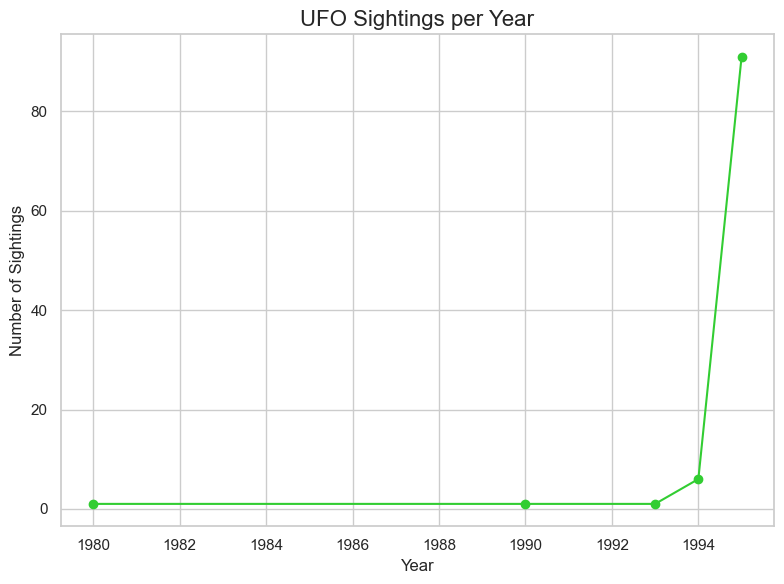

In [17]:
plt.figure(figsize=(8,6))
df['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='limegreen')
plt.title("UFO Sightings per Year", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Sightings")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4008\2621733482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_shapes.values, y=top_shapes.index, palette='mako')


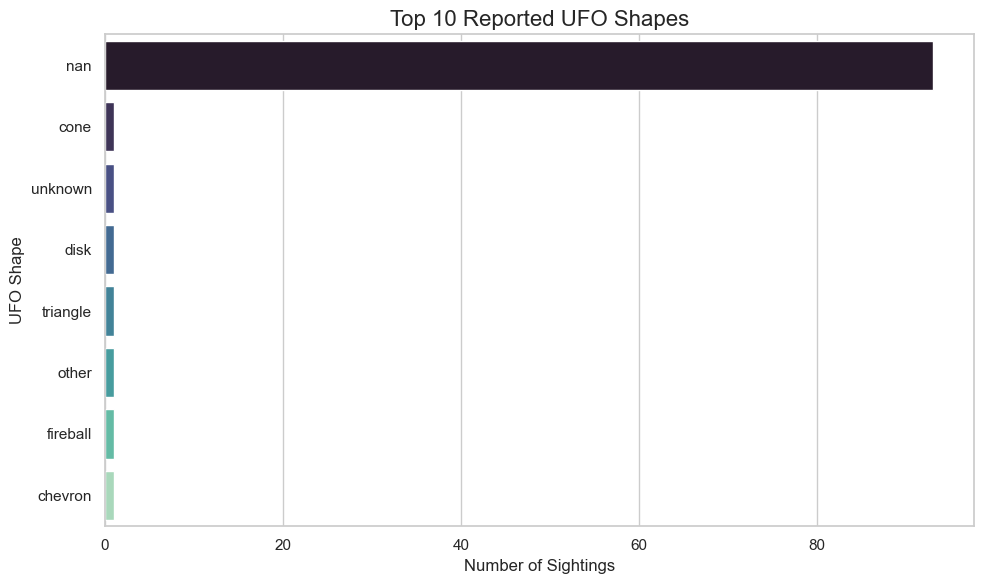

In [19]:
top_shapes = df['Shape'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_shapes.values, y=top_shapes.index, palette='mako')
plt.title("Top 10 Reported UFO Shapes", fontsize=16)
plt.xlabel("Number of Sightings")
plt.ylabel("UFO Shape")
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4008\1971673091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Weekday', order=weekday_order, palette='crest')


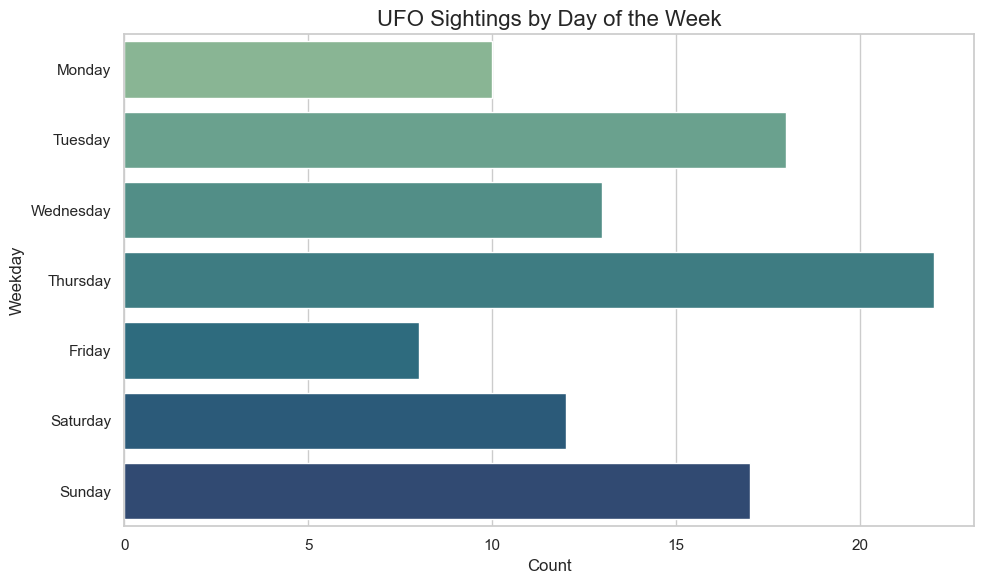

In [21]:
# Make sure Weekday exists
df['Weekday'] = df['Occurred'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Weekday', order=weekday_order, palette='crest')
plt.title("UFO Sightings by Day of the Week", fontsize=16)
plt.xlabel("Count")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()


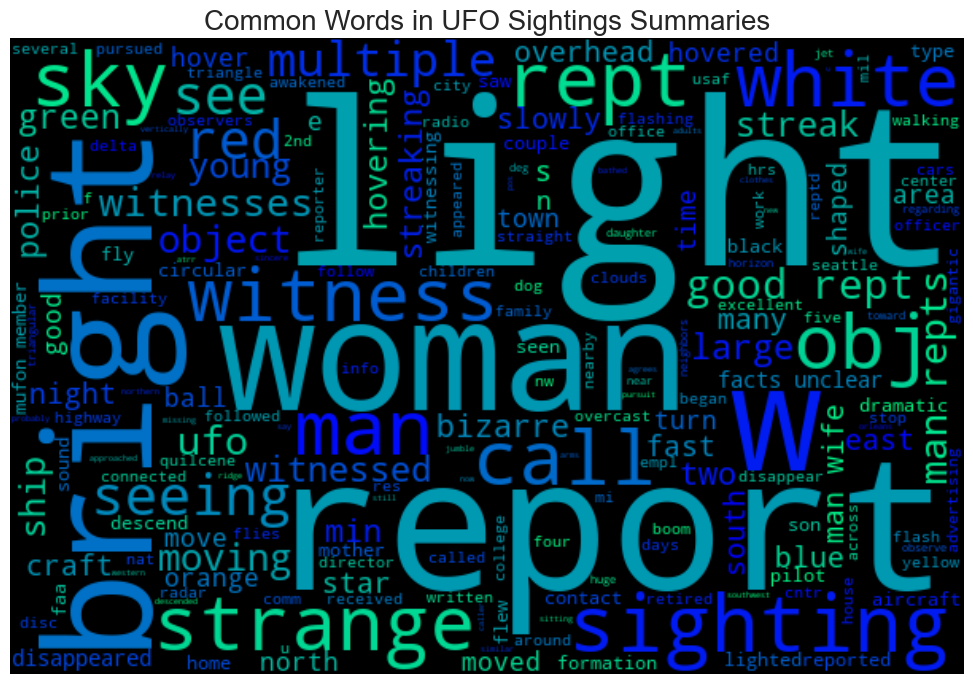

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all summaries into one string
text = " ".join(summary for summary in df['Summary'] if isinstance(summary, str))

wordcloud = WordCloud(width=600, height=400, background_color='black', colormap='winter').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in UFO Sightings Summaries", fontsize=20)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4008\1112736736.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




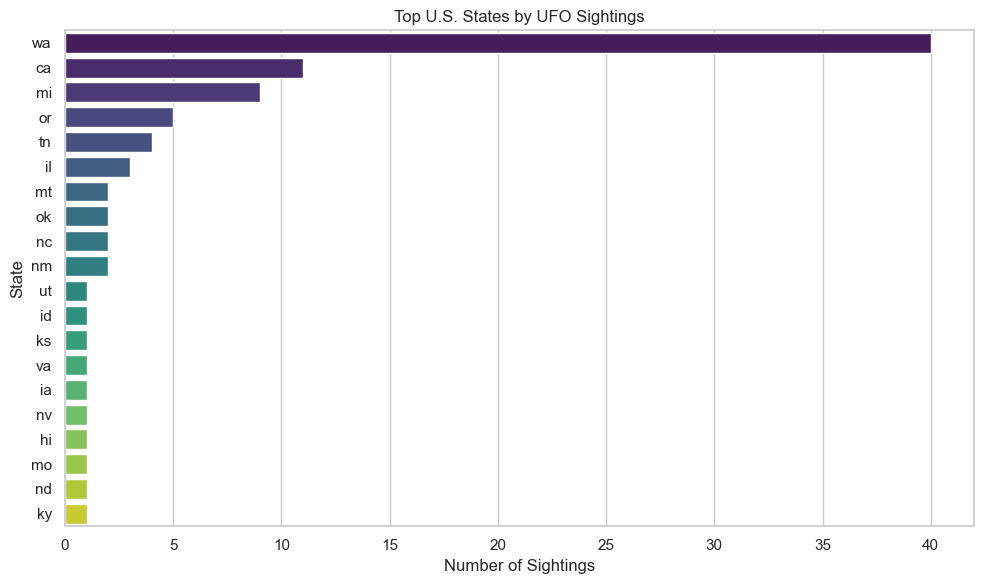

In [32]:
state_counts = df['State'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette='viridis')
plt.title("Top U.S. States by UFO Sightings")
plt.xlabel("Number of Sightings")
plt.ylabel("State")
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4008\248660321.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




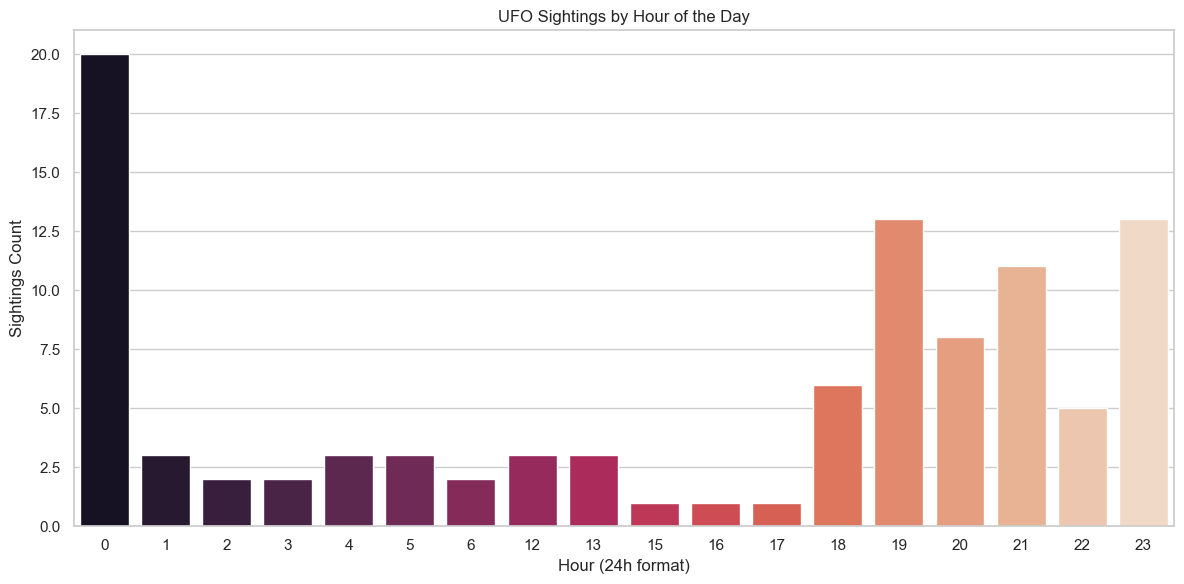

In [33]:
# Extract hour from Occurred
df['Hour'] = df['Occurred'].dt.hour

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Hour', palette='rocket')
plt.title("UFO Sightings by Hour of the Day")
plt.xlabel("Hour (24h format)")
plt.ylabel("Sightings Count")
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_4008\2716095233.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




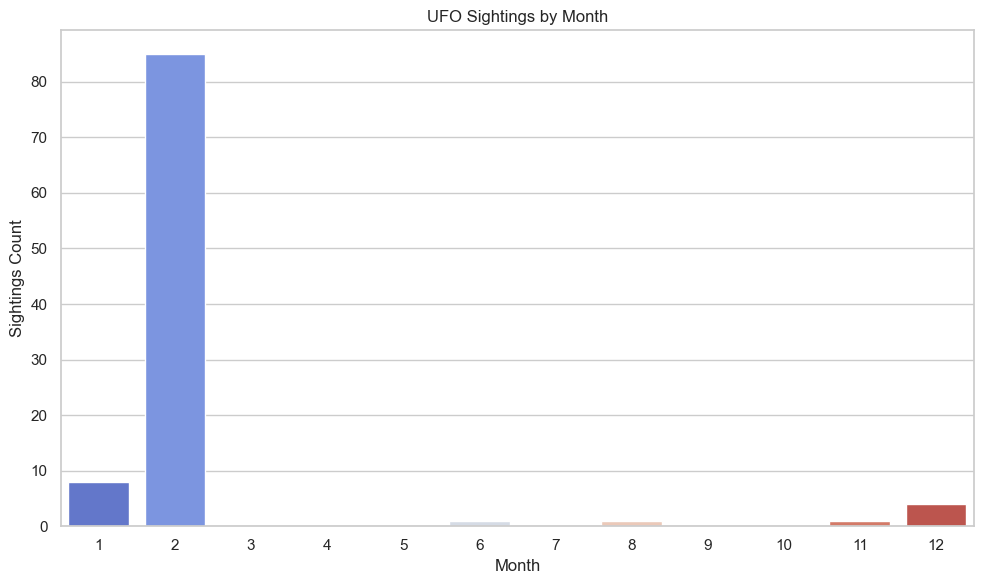

In [34]:
df['Month'] = df['Occurred'].dt.month
month_order = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Month', order=month_order, palette='coolwarm')
plt.title("UFO Sightings by Month")
plt.xlabel("Month")
plt.ylabel("Sightings Count")
plt.tight_layout()
plt.show()
